<a href="https://colab.research.google.com/github/saurabhguptajhs01/DeepLearning/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget https://www.dropbox.com/s/t4pzwpvrzneb190/training_set.zip
!wget https://www.dropbox.com/s/i37jfni3d29raoc/test_set.zip

--2023-12-28 06:18:46--  https://www.dropbox.com/s/t4pzwpvrzneb190/training_set.zip
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.18, 2620:100:601b:18::a27d:812
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/t4pzwpvrzneb190/training_set.zip [following]
--2023-12-28 06:18:46--  https://www.dropbox.com/s/raw/t4pzwpvrzneb190/training_set.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucbefeba72e07a64d2dc35881a19.dl.dropboxusercontent.com/cd/0/inline/CKPFiKMHaxN_s__YhHCQRgiojoKwLX0VhVIIUdJRnJ2uu1nkqHK8PfRC11xcfCF9U_cQQvpeoFkvSzDD4OYFRNh-uBCpST062yjC50KI1WwA1VRx5wDiclFRc2DISOCjsXo_SbkfV-SuwB78Kxhv54M9/file# [following]
--2023-12-28 06:18:46--  https://ucbefeba72e07a64d2dc35881a19.dl.dropboxusercontent.com/cd/0/inline/CKPFiKMHaxN_s__YhHCQRgiojoKwLX0VhVIIUdJRnJ2uu1nkqHK8PfRC11xcfCF9U_cQQvpeoFkvSzDD4OYFRNh-uB

In [ ]:
!unzip training_set.zip
!unzip test_set.zip

Streaming output truncated to the last 5000 lines.
  inflating: training_set/training_set/cats/cat.3704.jpg  
  inflating: training_set/training_set/cats/cat.3705.jpg  
  inflating: training_set/training_set/cats/cat.3706.jpg  
  inflating: training_set/training_set/cats/cat.3707.jpg  
  inflating: training_set/training_set/cats/cat.3708.jpg  
  inflating: training_set/training_set/cats/cat.3709.jpg  
  inflating: training_set/training_set/cats/cat.371.jpg  
  inflating: training_set/training_set/cats/cat.3710.jpg  
  inflating: training_set/training_set/cats/cat.3711.jpg  
  inflating: training_set/training_set/cats/cat.3712.jpg  
  inflating: training_set/training_set/cats/cat.3713.jpg  
  inflating: training_set/training_set/cats/cat.3714.jpg  
  inflating: training_set/training_set/cats/cat.3715.jpg  
  inflating: training_set/training_set/cats/cat.3716.jpg  
  inflating: training_set/training_set/cats/cat.3717.jpg  
  inflating: training_set/training_set/cats/cat.3718.jpg  
  infl

Populating the interactive namespace from numpy and matplotlib


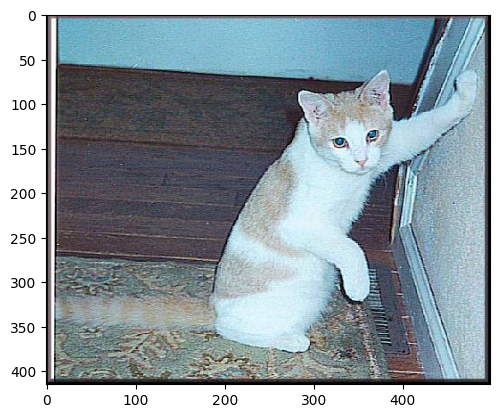

In [ ]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('/content/test_set/test_set/cats/cat.4001.jpg')
imgplot = plt.imshow(img)
plt.show()

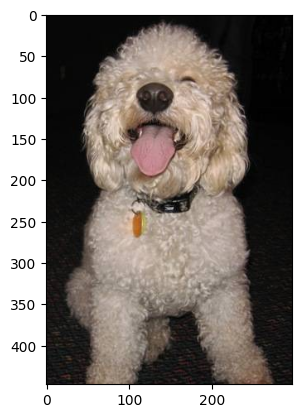

In [ ]:
img = mpimg.imread('/content/test_set/test_set/dogs/dog.4003.jpg')
imgplot = plt.imshow(img)
plt.show()

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, Activation
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [ ]:
print(tf.__version__)

2.15.0


In [ ]:
img_width, img_height = 150,150
train_data_dir = "/content/training_set/training_set"
validation_data_dir = "/content/test_set/test_set"
nb_train_sample = 100
nb_validation_samples = 100
epochs = 20
batch_size = 20


In [ ]:
import tensorflow.keras.backend as k
if k.image_data_format() == 'channels_first':
  input_shape=(3,img_width,img_height)
else:
  input_shape=(img_width,img_height,3)


In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_data_dir,target_size=(img_width,img_height), batch_size=batch_size, class_mode = 'binary', classes=['cats','dogs'])
validation_generator = test_datagen.flow_from_directory(validation_data_dir,target_size=(img_width,img_height), batch_size=batch_size, class_mode = 'binary')


Found 8005 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.


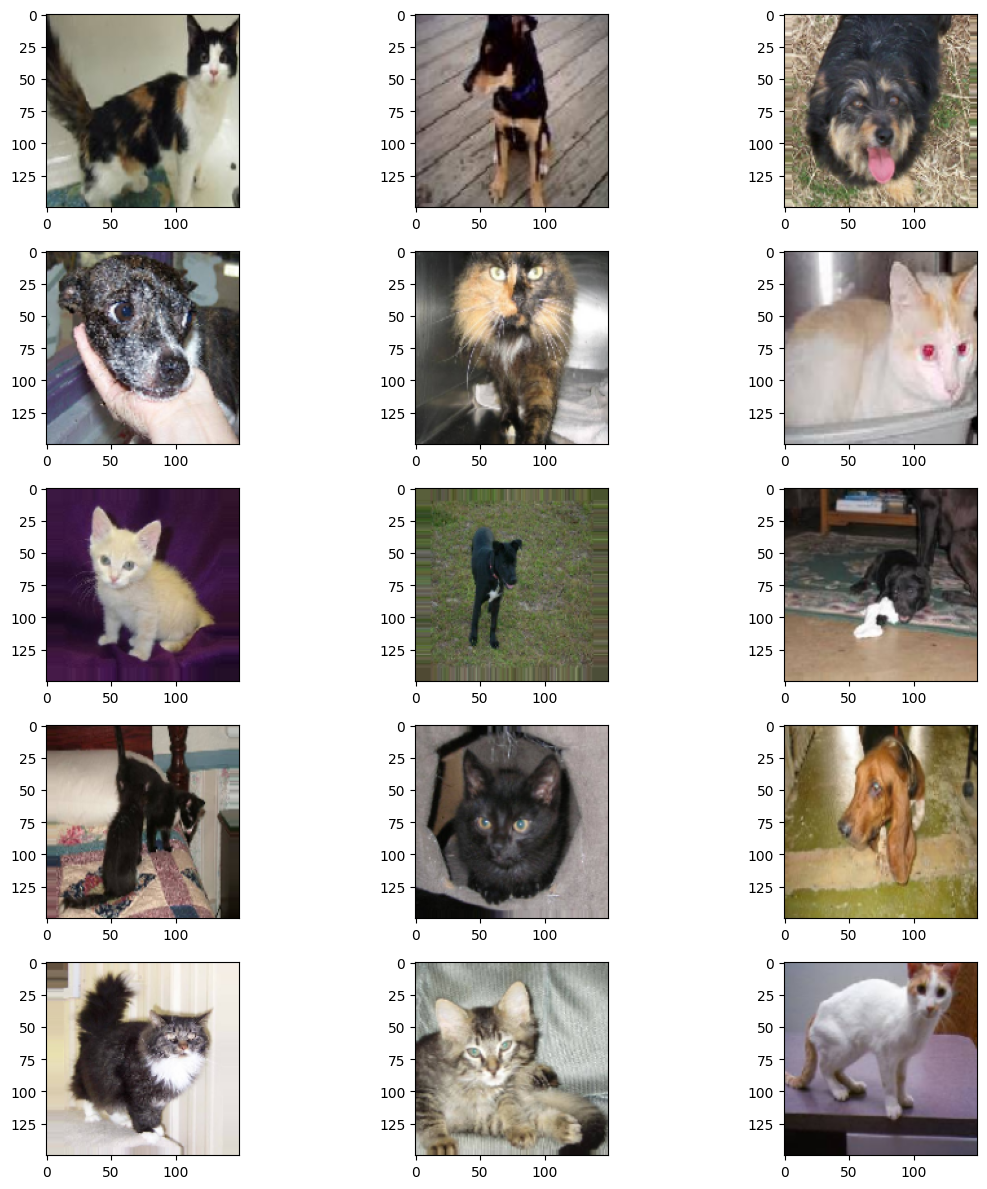

In [ ]:
plt.figure(figsize=(12,12))
for i in range(0,15):
  plt.subplot(5,3,i+1)
  for X_batch, Y_batch in train_generator:
    image = X_batch[0]
    plt.imshow(image)
    break
plt.tight_layout()
plt.show()

Layers in CNN:
  1. Convolution layer
  2. ReLu
  3. Pooling Layer
  4. Fully connected layer

In [ ]:
model = Sequential()
model.add(Conv2D(64,(3,3),input_shape=input_shape)) #64 nuerons with 3*3 filter

model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))

model.add(Activation('relu'))
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 64)      1792      
                                                                 
 activation (Activation)     (None, 148, 148, 64)      0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 64)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 350464)            0         
                                                                 
 dense (Dense)               (None, 64)                22429760  
                                                                 
 activation_1 (Activation)   (None, 64)                0         
                                                        

In [ ]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 64)      1792      
                                                                 
 activation (Activation)     (None, 148, 148, 64)      0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 64)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 350464)            0         
                                                                 
 dense (Dense)               (None, 64)                22429760  
                                                                 
 activation_1 (Activation)   (None, 64)                0         
                                                        

In [ ]:
training = model.fit_generator(train_generator, steps_per_epoch=nb_train_sample, epochs=epochs, validation_data=validation_generator, validation_steps=nb_validation_samples)

Epoch 1/20


<ipython-input-15-3c7efc68ef0a>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  training = model.fit_generator(train_generator, steps_per_epoch=nb_train_sample, epochs=epochs, validation_data=validation_generator, validation_steps=nb_validation_samples)


100/100 [==============================] - 20s 164ms/step - loss: 1.8719 - accuracy: 0.5660 - val_loss: 0.6443 - val_accuracy: 0.6150
Epoch 2/20
100/100 [==============================] - 17s 170ms/step - loss: 0.6644 - accuracy: 0.6175 - val_loss: 0.6210 - val_accuracy: 0.6675
Epoch 3/20
100/100 [==============================] - 20s 204ms/step - loss: 0.6640 - accuracy: 0.6205 - val_loss: 0.7167 - val_accuracy: 0.5600
Epoch 4/20
100/100 [==============================] - 18s 182ms/step - loss: 0.6324 - accuracy: 0.6418 - val_loss: 0.6213 - val_accuracy: 0.6455
Epoch 5/20
100/100 [==============================] - 18s 184ms/step - loss: 0.6194 - accuracy: 0.6500 - val_loss: 0.5731 - val_accuracy: 0.7080
Epoch 6/20
100/100 [==============================] - 17s 174ms/step - loss: 0.6203 - accuracy: 0.6605 - val_loss: 0.5808 - val_accuracy: 0.6910
Epoch 7/20
100/100 [==============================] - 16s 163ms/step - loss: 0.5932 - accuracy: 0.6740 - val_loss: 0.5755 - val_accuracy: 0.6

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


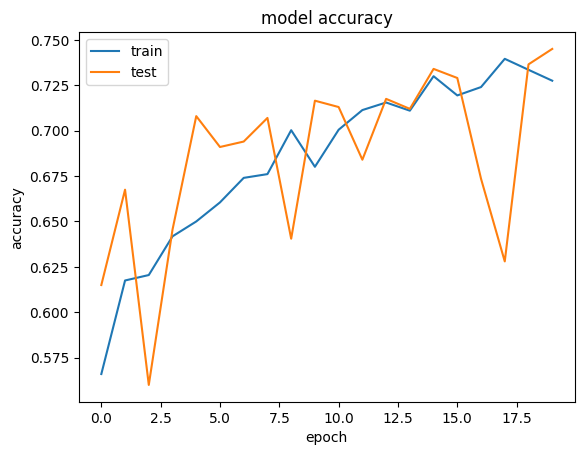

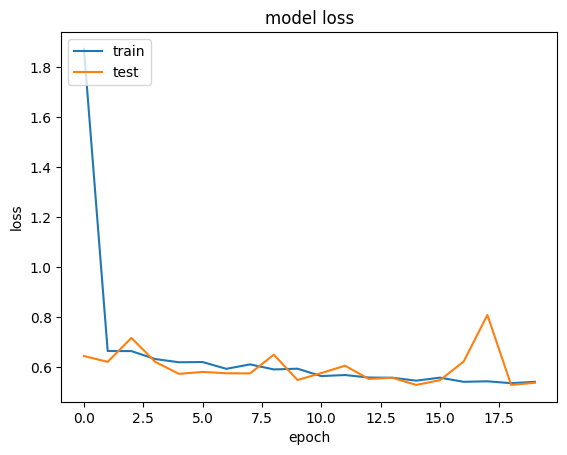

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
print(training.history.keys())

plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

1/1 [==============================] - 0s 216ms/step
[[1.]]
Prediction:  Dog


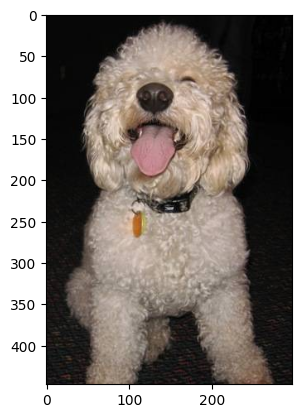

In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np
img_pred = image.load_img("/content/test_set/test_set/dogs/dog.4003.jpg",target_size=(150,150))

img_pred = image.img_to_array(img_pred)
img_pred = np.expand_dims(img_pred,axis=0)

rslt = model.predict(img_pred)
print(rslt)
if rslt[0][0] == 1:
  prediction = "Dog"
else:
  prediction = "Cat"
print('Prediction: ',prediction)

img = mpimg.imread('/content/test_set/test_set/dogs/dog.4003.jpg')
imgplot = plt.imshow(img)
plt.show()

1/1 [==============================] - 0s 27ms/step
[[1.]]
Prediction:  Dog


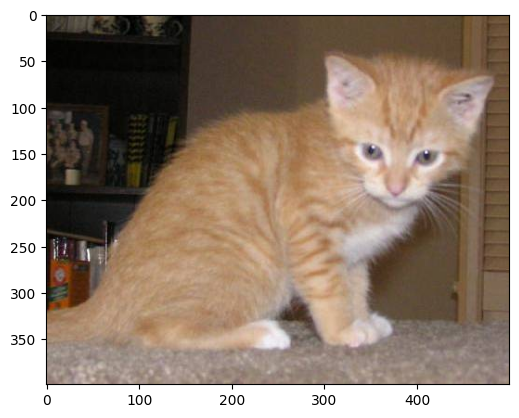

In [ ]:
img_pred = image.load_img("/content/test_set/test_set/cats/cat.4003.jpg",target_size=(150,150))

img_pred = image.img_to_array(img_pred)
img_pred = np.expand_dims(img_pred,axis=0)

rslt = model.predict(img_pred)
print(rslt)
if rslt[0][0] == 1:
  prediction = "Dog"
else:
  prediction = "Cat"
print('Prediction: ',prediction)

img = mpimg.imread('/content/test_set/test_set/cats/cat.4003.jpg')
imgplot = plt.imshow(img)
plt.show()

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

earlyStop = EarlyStopping(patience=10)
learningRateReduction = ReduceLROnPlateau(monitor='val_accuracy',patience=2,verbose=1,factor=0.5,min_lr=0.00001)
callbacks = [earlyStop, learningRateReduction]

model1 = Sequential()
model1.add(Conv2D(64,(3,3),input_shape=input_shape))
model1.add(Activation('relu'))
model1.add(MaxPooling2D(pool_size=(2,2)))
model1.add(Flatten())

model1.add(Dense(64))
model1.add(Activation('relu'))
model1.add(Dropout(0.5))
model1.add(Dense(1))
model1.add(Activation('sigmoid'))

model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 148, 148, 64)      1792      
                                                                 
 activation_3 (Activation)   (None, 148, 148, 64)      0         
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 74, 74, 64)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 350464)            0         
                                                                 
 dense_2 (Dense)             (None, 64)                22429760  
                                                                 
 activation_4 (Activation)   (None, 64)                0         
                                                      

In [ ]:
model1.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 148, 148, 64)      1792      
                                                                 
 activation_3 (Activation)   (None, 148, 148, 64)      0         
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 74, 74, 64)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 350464)            0         
                                                                 
 dense_2 (Dense)             (None, 64)                22429760  
                                                                 
 activation_4 (Activation)   (None, 64)                0         
                                                      

In [ ]:
training = model1.fit_generator(train_generator, steps_per_epoch=nb_train_sample,epochs=epochs,validation_data=validation_generator,validation_steps=nb_validation_samples,callbacks=callbacks)

Epoch 1/20


<ipython-input-21-ac7d08b6319e>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  training = model1.fit_generator(train_generator, steps_per_epoch=nb_train_sample,epochs=epochs,validation_data=validation_generator,validation_steps=nb_validation_samples,callbacks=callbacks)


100/100 [==============================] - 19s 162ms/step - loss: 1.3230 - accuracy: 0.5395 - val_loss: 0.6855 - val_accuracy: 0.5350 - lr: 0.0010
Epoch 2/20
100/100 [==============================] - 18s 176ms/step - loss: 0.6794 - accuracy: 0.5790 - val_loss: 0.6505 - val_accuracy: 0.5970 - lr: 0.0010
Epoch 3/20
100/100 [==============================] - 17s 165ms/step - loss: 0.6534 - accuracy: 0.6265 - val_loss: 0.6566 - val_accuracy: 0.5910 - lr: 0.0010
Epoch 4/20
100/100 [==============================] - 18s 184ms/step - loss: 0.6520 - accuracy: 0.6385 - val_loss: 0.6138 - val_accuracy: 0.6765 - lr: 0.0010
Epoch 5/20
100/100 [==============================] - 16s 164ms/step - loss: 0.6335 - accuracy: 0.6485 - val_loss: 0.6114 - val_accuracy: 0.6845 - lr: 0.0010
Epoch 6/20
100/100 [==============================] - 16s 165ms/step - loss: 0.6369 - accuracy: 0.6480 - val_loss: 0.6164 - val_accuracy: 0.6725 - lr: 0.0010
Epoch 7/20
100/100 [==============================] - ETA: 0s -

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])


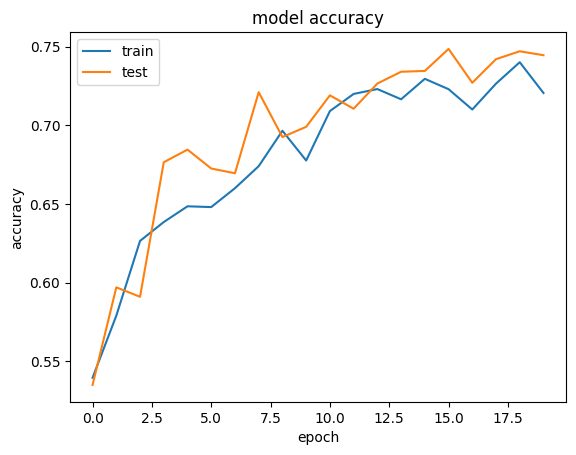

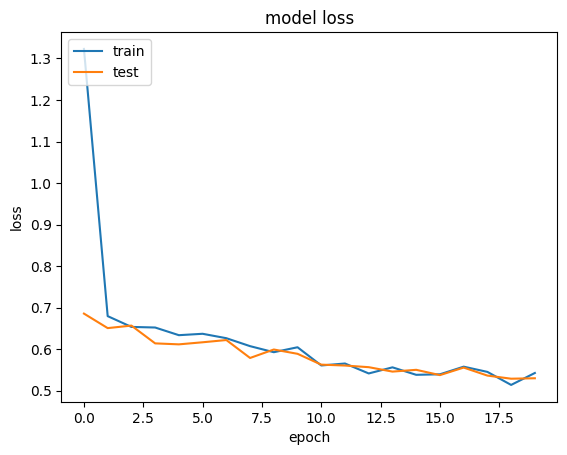

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
# list all data in training
print(training.history.keys())
# summarize training for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize traning for loss
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

1/1 [==============================] - 0s 90ms/step
[[1.]]
Prediction:  Dog


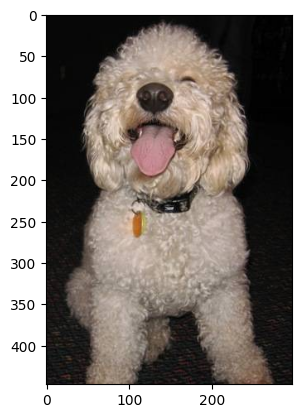

In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np
img_pred = image.load_img("/content/test_set/test_set/dogs/dog.4003.jpg",target_size=(150,150))

img_pred=image.img_to_array(img_pred)
img_pred=np.expand_dims(img_pred, axis=0)

result = model1.predict(img_pred)
print(result)
if result[0][0]==1:
    prediction ="Dog"
else:
    prediction ="Cat"
print('Prediction: ',prediction)

img=mpimg.imread('/content/test_set/test_set/dogs/dog.4003.jpg')
imgplot = plt.imshow(img)
plt.show()

1/1 [==============================] - 0s 17ms/step
[[1.]]
Prediction:  Dog


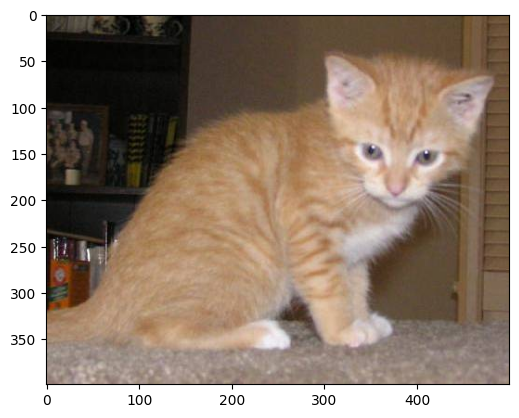

In [ ]:
img_pred = image.load_img("/content/test_set/test_set/cats/cat.4003.jpg",target_size=(150,150))

img_pred=image.img_to_array(img_pred)
img_pred=np.expand_dims(img_pred, axis=0)

rslt = model1.predict(img_pred)
print(rslt)
if rslt[0][0]==1:
    prediction ="Dog"
else:
    prediction ="Cat" #int('Prediction: ',prediction)
print('Prediction: ',prediction)

img=mpimg.imread('/content/test_set/test_set/cats/cat.4003.jpg')
imgplot = plt.imshow(img)
plt.show()


In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

earlystop = EarlyStopping(patience=10)
learningRateReduction = ReduceLROnPlateau(monitor='val_accuracy',patience=2,verbose=1,factor=0.5,min_lr=0.00001)
callbacks = [earlystop, learningRateReduction]

model2 = Sequential()
model2.add(Conv2D(32,(3,3),input_shape=input_shape))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2,2)))
model2.add(Dropout(0.25))

model2.add(Conv2D(64,(3,3),activation='relu'))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2,2)))
model2.add(Dropout(0.25))

model2.add(Conv2D(128,(3,3),activation='relu'))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2,2)))
model2.add(Dropout(0.25))

model2.add(Flatten())
model2.add(Dense(512, activation='relu'))
model2.add(BatchNormalization())
model2.add(Dropout(0.5))
model2.add(Dense(1, activation='softmax')) # 2 because we have cat and dog classes

In [ ]:
model2.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])
model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 148, 148, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 74, 74, 32)        0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 74, 74, 32)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 batch_normalization_1 (Bat  (None, 72, 72, 64)       

In [ ]:
training = model2.fit_generator(train_generator,
                   steps_per_epoch=nb_train_sample,epochs=epochs,
                   validation_data=validation_generator,
                       validation_steps=nb_validation_samples,callbacks=callbacks)

Epoch 1/20


<ipython-input-28-e326fc04b449>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  training = model2.fit_generator(train_generator,


100/100 [==============================] - 24s 199ms/step - loss: 1.0671 - accuracy: 0.4820 - val_loss: 0.9983 - val_accuracy: 0.5015 - lr: 0.0010
Epoch 2/20
100/100 [==============================] - 19s 192ms/step - loss: 0.8698 - accuracy: 0.4940 - val_loss: 0.7470 - val_accuracy: 0.4975 - lr: 0.0010
Epoch 3/20
100/100 [==============================] - ETA: 0s - loss: 0.7564 - accuracy: 0.5053
Epoch 3: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
100/100 [==============================] - 18s 183ms/step - loss: 0.7564 - accuracy: 0.5053 - val_loss: 0.7738 - val_accuracy: 0.4995 - lr: 0.0010
Epoch 4/20
100/100 [==============================] - 19s 193ms/step - loss: 0.6833 - accuracy: 0.4785 - val_loss: 0.7358 - val_accuracy: 0.5020 - lr: 5.0000e-04
Epoch 5/20
100/100 [==============================] - 20s 197ms/step - loss: 0.6536 - accuracy: 0.4935 - val_loss: 0.6802 - val_accuracy: 0.5010 - lr: 5.0000e-04
Epoch 6/20
 99/100 [============================>.] 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])


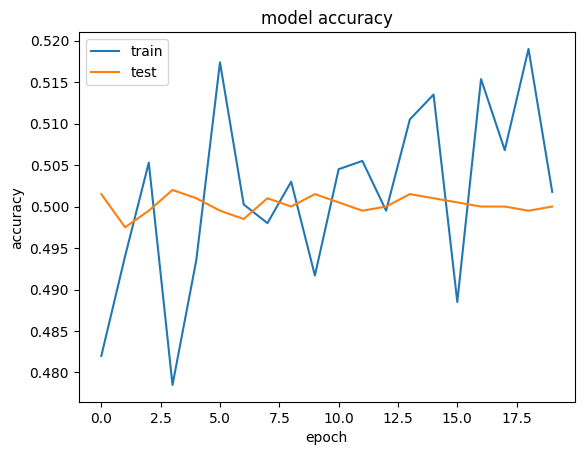

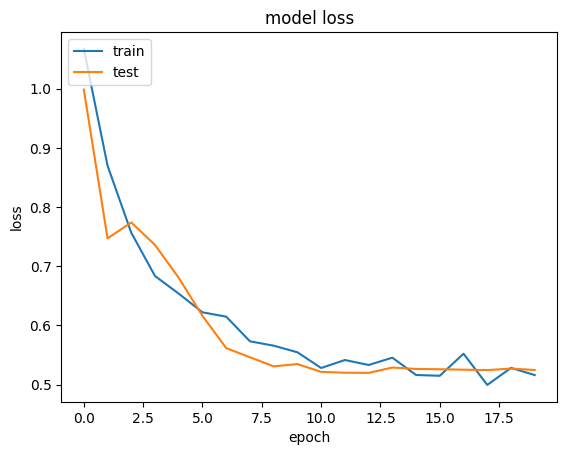

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
# list all data in training
print(training.history.keys())
# summarize training for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize traning for loss
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

1/1 [==============================] - 0s 325ms/step
[[1.]]
Prediction:  Dog


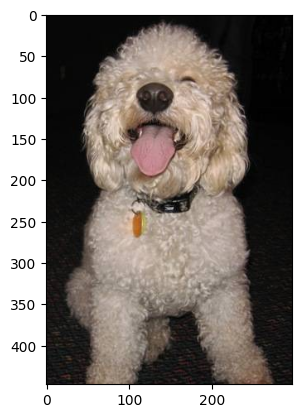

In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np
img_pred = image.load_img("/content/test_set/test_set/dogs/dog.4003.jpg",target_size=(150,150))

img_pred=image.img_to_array(img_pred)
img_pred=np.expand_dims(img_pred, axis=0)

result = model2.predict(img_pred)
print(result)
if result[0][0]==1:
    prediction ="Dog"
else:
    prediction ="Cat"
print('Prediction: ',prediction)

img=mpimg.imread('/content/test_set/test_set/dogs/dog.4003.jpg')
imgplot = plt.imshow(img)
plt.show()

1/1 [==============================] - 0s 17ms/step
[[1.]]
Prediction:  Dog


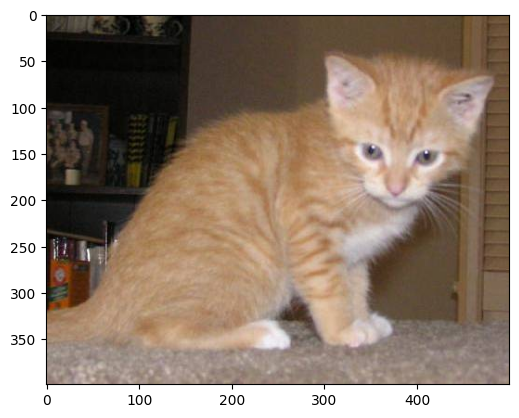

In [ ]:
img_pred = image.load_img("/content/test_set/test_set/cats/cat.4003.jpg",target_size=(150,150))

img_pred=image.img_to_array(img_pred)
img_pred=np.expand_dims(img_pred, axis=0)

rslt = model2.predict(img_pred)
print(rslt)
if rslt[0][0]==1:
    prediction ="Dog"
else:
    prediction ="Cat"
print('Prediction: ',prediction)

img=mpimg.imread('/content/test_set/test_set/cats/cat.4003.jpg')
imgplot = plt.imshow(img)
plt.show()

Freeze the model

In [ ]:
import json
from keras.models import model_from_json
from keras.models import load_model
from keras.preprocessing import image
import numpy as np

model_json = model2.to_json()
with open("model2.json","w") as json_file:
  json_file.write(model_json)

model2.save_weights('first_try.h5')
print("[INFO] Saved model to disk")


[INFO] Saved model to disk


Load the model

Loaded model from disk
1/1 [==============================] - 0s 116ms/step
[[1.]]
1/1 [==============================] - 0s 19ms/step
[[1.]]
Prediction:  Dog


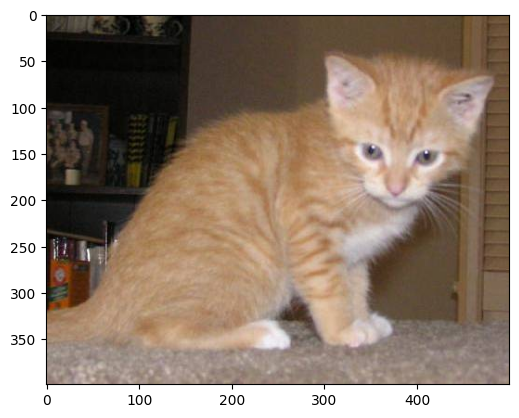

In [ ]:
json_file = open("model2.json","r")
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
loaded_model.load_weights("first_try.h5")
print("Loaded model from disk")

#predicting images
img = image.load_img(r"/content/training_set/training_set/cats/cat.1.jpg", target_size=(img_width, img_height))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

clas = loaded_model.predict(x)
print(clas)
clas = model2.predict(img_pred)
print(rslt)
if rslt[0][0] == 1:
  prediction = "Dog"
else:
  prediction = "Cat"

print('Prediction: ',prediction)

img = mpimg.imread('/content/test_set/test_set/cats/cat.4003.jpg')
imgplot = plt.imshow(img)
plt.show()

Build CNN model 3 using VGG16 pretrained model

In [ ]:
from keras.models import Sequential
from keras import layers
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, GlobalMaxPooling2D
from keras import applications
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras.applications import VGG16
from keras.models import Model

image_size = 150
input_shape = (image_size,image_size,3)
epochs = 20
batch_size = 16

pre_trained_model = VGG16(input_shape=input_shape, include_top=False,weights="imagenet")

for layer in pre_trained_model.layers[:15]:
  layer.trainable = False

for layer in pre_trained_model.layers[15:]:
  layer.trainable = True

last_layer = pre_trained_model.get_layer('block5_pool')
last_output = last_layer.output

x = GlobalMaxPooling2D()(last_output)
x = Dense(512,activation='relu')(x)
x = Dropout(0.5)(x)
x = layers.Dense(1,activation='sigmoid')(x)

model3 = Model(pre_trained_model.input,x)


In [ ]:
model3.compile(loss='binary_crossentropy',optimizer=optimizers.SGD(lr=1e-4, momentum=0.9),metrics=['accuracy'])
model3.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0   

In [ ]:
training = model3.fit_generator(train_generator, steps_per_epoch=nb_train_sample,epochs=epochs,validation_data=validation_generator,validation_steps=nb_validation_samples,callbacks=callbacks)

Epoch 1/20


<ipython-input-43-b8814db9ef4a>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  training = model3.fit_generator(train_generator, steps_per_epoch=nb_train_sample,epochs=epochs,validation_data=validation_generator,validation_steps=nb_validation_samples,callbacks=callbacks)


100/100 [==============================] - 31s 270ms/step - loss: 0.4777 - accuracy: 0.7547 - val_loss: 0.2885 - val_accuracy: 0.8705 - lr: 0.0100
Epoch 2/20
100/100 [==============================] - 25s 250ms/step - loss: 0.2936 - accuracy: 0.8720 - val_loss: 0.2758 - val_accuracy: 0.8855 - lr: 0.0100
Epoch 3/20
100/100 [==============================] - 20s 202ms/step - loss: 0.2549 - accuracy: 0.8905 - val_loss: 0.1946 - val_accuracy: 0.9215 - lr: 0.0100
Epoch 4/20
100/100 [==============================] - 25s 250ms/step - loss: 0.2224 - accuracy: 0.9159 - val_loss: 0.2565 - val_accuracy: 0.9065 - lr: 0.0100
Epoch 5/20
100/100 [==============================] - ETA: 0s - loss: 0.1890 - accuracy: 0.9174
Epoch 5: ReduceLROnPlateau reducing learning rate to 0.004999999888241291.
100/100 [==============================] - 21s 208ms/step - loss: 0.1890 - accuracy: 0.9174 - val_loss: 0.1859 - val_accuracy: 0.9190 - lr: 0.0100
Epoch 6/20
100/100 [==============================] - 21s 213

1/1 [==============================] - 1s 1s/step
[[1.]]
Prediction:  Dog


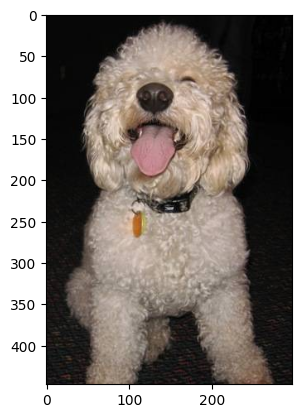

In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np
img_pred = image.load_img("/content/test_set/test_set/dogs/dog.4003.jpg",target_size=(150,150))

img_pred=image.img_to_array(img_pred)
img_pred=np.expand_dims(img_pred, axis=0)

result = model3.predict(img_pred)
print(result)
if result[0][0]==1:
    prediction ="Dog"
else:
    prediction ="Cat"
print('Prediction: ',prediction)

img=mpimg.imread('/content/test_set/test_set/dogs/dog.4003.jpg')
imgplot = plt.imshow(img)
plt.show()

1/1 [==============================] - 0s 25ms/step
[[0.]]
Prediction:  Cat


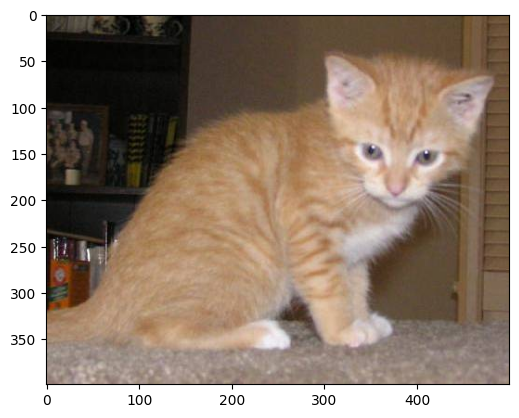

In [ ]:
img_pred = image.load_img("/content/test_set/test_set/cats/cat.4003.jpg",target_size=(150,150))

img_pred=image.img_to_array(img_pred)
img_pred=np.expand_dims(img_pred, axis=0)

rslt = model3.predict(img_pred)
print(rslt)
if rslt[0][0]==1:
    prediction ="Dog"
else:
    prediction ="Cat"
print('Prediction: ',prediction)

img=mpimg.imread('/content/test_set/test_set/cats/cat.4003.jpg')
imgplot = plt.imshow(img)
plt.show()